<a href="https://colab.research.google.com/github/hatemrizk/videoautoqa/blob/main/KDM_Final_Project_Hatem_Rizk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Automatic Question Generation from Video Content for Use in Cognitive Assessments.
---
Periodic cognitive health assessments are an important tool in diagnostics of several health conditions including Delirium, Dementia, and/or Depression. These tests aid medical professionals evaluate the severity and progression of cognitive impairment. The most widely used tool in cognitive assessment today is the Mini-Mental State Examination (MMSE), which developed in 1975. The test is a 30-point questionnaire which examines functions including Orientation, Registration, Attention, Calculator, Recall, Language, as well as, Copying. Several studies have linked the increase in administering the copy-righted test with overall health care savings and improved quality of life in the elders. However, this test was found to be less sensitive to mild changes in cognitive behavior, lacking ability to detect progeressive changes in Alzheimer, and affected by age, education, and cultural background. In this project, we aim to improve cognitive testing by using Natural Language Processing (NLP) and Deep Learning Object Detection technologies to assess a patient's cognitive abilities. 


---

The below questions can be used as part of an online congnitive assessment applications for measuring a patient's Registration, Attention, and Recall.


In [14]:
#Install the youtube-transcript-api library
!pip install --quiet youtube_transcript_api

In [15]:
!python --version

Python 3.7.15


# Download Video Captions

The youtube-transcript-api is used here to download caption information for a given Youtube video. The library can be referenced by accessing the link below:
https://pypi.org/project/youtube-transcript-api/

In [16]:
#Import library
from youtube_transcript_api import YouTubeTranscriptApi

video_link = 'https://www.youtube.com/watch?v=LZDfGiXJjjI&t=5s'

#Extract video id
video_id = video_link.split('watch?v=')[1]

#Download caption information
subtitles = YouTubeTranscriptApi.get_transcript(video_id=video_id, languages=['en'])
#transcript_list = YouTubeTranscriptApi.list_transcripts(video_id)
print(subtitles)

[{'text': '[Music]', 'start': 5.17, 'duration': 12.5}, {'text': '[Music]', 'start': 23.66, 'duration': 6.449}, {'text': '[Music]', 'start': 35.04, 'duration': 14.88}, {'text': 'arabia an ancient and mysterious land', 'start': 46.399, 'duration': 6.081}, {'text': "underneath saudi's islamic regime and", 'start': 49.92, 'duration': 5.6}, {'text': 'its rich oil resources lies many untold', 'start': 52.48, 'duration': 4.559}, {'text': 'truths', 'start': 55.52, 'duration': 4.559}, {'text': 'these discoveries recently led many to', 'start': 57.039, 'duration': 5.921}, {'text': 'believe this land to be in fact the lost', 'start': 60.079, 'duration': 6.521}, {'text': 'land of moses', 'start': 62.96, 'duration': 3.64}, {'text': '[Music]', 'start': 73.12, 'duration': 3.409}, {'text': 'join us as we reveal to you the biblical', 'start': 78.799, 'duration': 7.481}, {'text': 'proofs behind these sites', 'start': 81.92, 'duration': 4.36}, {'text': '[Music]', 'start': 86.49, 'duration': 15.52}, {'tex

In [17]:
#Import pandas library and convert to dataframe
import pandas as pd

subtitles_df = pd.DataFrame(subtitles)

In [106]:
#Inspect results
subtitles_df.head(10)

text    start  duration
3      arabia an ancient and mysterious land   46.399     6.081
4      underneath saudi's islamic regime and   49.920     5.600
5    its rich oil resources lies many untold   52.480     4.559
6                                     truths   55.520     4.559
7     these discoveries recently led many to   57.039     5.921
8   believe this land to be in fact the lost   60.079     6.521
9                              land of moses   62.960     3.640
11  join us as we reveal to you the biblical   78.799     7.481
12                 proofs behind these sites   81.920     4.360
14     it is time everyone knows god's words  102.880     6.000

# Cleanup of Downloaded Captions

The caption records downloaded have snippets of text and video timeframes associated with these captions. In cells below we remove any irrelevent text and remove any special characters.

In [23]:
subtitles_df['text'] = subtitles_df['text'].apply(lambda x: x.replace("-", "") if "-" in x else x) 

In [24]:
#Remove records for [Music] captions
subtitles_df = subtitles_df[subtitles_df['text'] != '[Music]']

In [25]:
#Inspect results
subtitles_df.head(30)

text    start  duration
3      arabia an ancient and mysterious land   46.399     6.081
4      underneath saudi's islamic regime and   49.920     5.600
5    its rich oil resources lies many untold   52.480     4.559
6                                     truths   55.520     4.559
7     these discoveries recently led many to   57.039     5.921
8   believe this land to be in fact the lost   60.079     6.521
9                              land of moses   62.960     3.640
11  join us as we reveal to you the biblical   78.799     7.481
12                 proofs behind these sites   81.920     4.360
14     it is time everyone knows god's words  102.880     6.000
15   are infallible and that his stories are  105.840     6.040
16                                      true  108.880     3.000
17     i present to you the real mount sinai  118.479     9.161
18           unveiling the secrets of arabia  122.640     5.000
20                             for centuries  137.520     3.840
21    the presently accepted location of the  139.280     4.480
22     mountain being the sinai peninsula in  141.360     6.879
23   egypt has been debated by many scholars  143.760     7.040
24  the early chapters of exodus tells us in  148.239     5.681
25  fact that mount sinai is in midian which  150.800     6.000
26                        is in saudi arabia  153.920     5.760
27     at age 40 moses fled from the face of  156.800     6.079
28    pharaoh in egypt and dwelt in the land  159.680     5.680
29                                 of midian  162.879     4.640
30    moses was standing the flock of jethro  165.360     4.640
31      his fatherinlaw the priest of midian  167.519     4.720
32   and he led the flock to the back of the  170.000     5.519
33    desert and came to the mountain of god  172.239     6.000
34    this is where moses encountered god in  175.519     4.561
35                          the burning bush  178.239     4.321

In [26]:
remove_index_list = subtitles_df.index[(subtitles_df.text.str[:1] == "(") | (subtitles_df.text.str[:1] == ">")].tolist()

In [27]:
subtitles_df.iloc[remove_index_list]

Empty DataFrame
Columns: [text, start, duration]
Index: []

In [28]:
subtitles_df.drop(remove_index_list, inplace=True)

In [29]:
subtitles_df.head()

text   start  duration
3    arabia an ancient and mysterious land  46.399     6.081
4    underneath saudi's islamic regime and  49.920     5.600
5  its rich oil resources lies many untold  52.480     4.559
6                                   truths  55.520     4.559
7   these discoveries recently led many to  57.039     5.921

# Create Text Corpus 

Below we combine all indivial caption strings into one text corpus. Note that the text is missing all puncations. This will affect accuracy of downstream NLP processing. To fix this, we use an NLP model called *rpunct* to add back puncations and create more meaningful text. The rpunct package works to   restore punctations on arbitrarily large texts and uses theHuggingFace's bert-base-uncased model weights that have been fine-tuned for Punctuation restoration. It can be fined tuned to specific domains but in our case, it worked fine without any further fine-tuning.

In [30]:
#Combine caption snippets into one text corpus
#Note lack of puncuations.
caption_text = subtitles_df.text.str.cat(sep=" ")
print(caption_text)

arabia an ancient and mysterious land underneath saudi's islamic regime and its rich oil resources lies many untold truths these discoveries recently led many to believe this land to be in fact the lost land of moses join us as we reveal to you the biblical proofs behind these sites it is time everyone knows god's words are infallible and that his stories are true i present to you the real mount sinai unveiling the secrets of arabia for centuries the presently accepted location of the mountain being the sinai peninsula in egypt has been debated by many scholars the early chapters of exodus tells us in fact that mount sinai is in midian which is in saudi arabia at age 40 moses fled from the face of pharaoh in egypt and dwelt in the land of midian moses was standing the flock of jethro his fatherinlaw the priest of midian and he led the flock to the back of the desert and came to the mountain of god this is where moses encountered god in the burning bush god gave him an important command

In [31]:
len(caption_text)

9428

In [33]:
!pip install --quiet rpunct

     |████████████████████████████████| 804.1 MB 2.5 kB/s 
     |████████████████████████████████| 981 kB 59.9 MB/s 
     |████████████████████████████████| 213 kB 88.5 MB/s 
     |████████████████████████████████| 9.9 MB 64.2 MB/s 
     |████████████████████████████████| 9.2 MB 82.4 MB/s 
     |████████████████████████████████| 441 kB 89.5 MB/s 
     |████████████████████████████████| 125 kB 78.4 MB/s 
     |████████████████████████████████| 1.9 MB 53.4 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 1.3 MB 60.6 MB/s 
     |████████████████████████████████| 115 kB 92.5 MB/s 
     |████████████████████████████████| 95 kB 4.5 MB/s 
     |████████████████████████████████| 212 kB 94.9 MB/s 
     |████████████████████████████████| 127 kB 75.0 MB/s 
     |████████████████████████████████| 115 kB 75.0 MB/s 
     |████████████████████████████████| 182 kB 78.9 MB/s 
     |████████████████████████████████| 237 kB 68.5 MB/s 
     |███████████

In [34]:
#Import library
from rpunct import RestorePuncts

#Instantiate model
rpunct = RestorePuncts()

#Generate new text with puncuations added.
cap_txt_punct_added = rpunct.punctuate(caption_text)

Downloading:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/530 [00:00<?, ?B/s]

In [35]:
#Caption corpus with puncuations restored
print(cap_txt_punct_added)

Arabia, an ancient and mysterious land. underneath Saudi's Islamic regime and its rich oil resources lies many untold truths. These discoveries recently led many to believe this land to be in fact, the lost land of Moses. Join us as we reveal to you the biblical proofs behind these sites. It is time. Everyone knows God's words are infallible and that his stories are true. I present to you the real Mount Sinai, unveiling the secrets of Arabia. For centuries, the presently accepted location of the mountain, being the Sinai Peninsula in Egypt, has been debated by many scholars. The early chapters of Exodus tells us in fact that Mount Sinai is in Midian, which is in Saudi Arabia. At age 40, Moses fled from the face of Pharaoh in Egypt and dwelt in the land of Midian. Moses was standing the flock of Jethro, his fatherinlaw, the priest of Midian, and he led the flock to the back of the desert and came to the mountain of God. This is where Moses encountered God in the burning bush. God gave h

# Application of Name Entity Recognition NLP Techniques

In the following section we download a pretrained N*ame Entity Recognition (NER)* tokenizer and model from the *HuggingFace* library to extract useful information from our downloaded captions including Persons, Locations, Organizations, and Misc entities. We can then use this information in subsequent steps to generate questions based on content within the video.

In [36]:
!pip install --quiet transformers

In [37]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import pandas as pd

checkpoint = "Jean-Baptiste/roberta-large-ner-english"
#checkpoint = "xlm-roberta-large-finetuned-conll03-english"
#checkpoint = "dslim/bert-base-NER"
tokenizer = AutoTokenizer.from_pretrained(checkpoint )
model = AutoModelForTokenClassification.from_pretrained(checkpoint)

ner_tagger = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

ner_outputs = pd.DataFrame(ner_tagger(caption_text))

Downloading:   0%|          | 0.00/255 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/849 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

In [38]:
ner_outputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   entity_group  49 non-null     object 
 1   score         49 non-null     float32
 2   word          49 non-null     object 
 3   start         49 non-null     int64  
 4   end           49 non-null     int64  
dtypes: float32(1), int64(2), object(2)
memory usage: 1.8+ KB


In [39]:
ner_outputs

entity_group     score           word  start   end
0           LOC  0.999560         arabia      0     6
1           LOC  0.986841          saudi     49    54
2          MISC  0.998583        islamic     57    64
3           PER  0.977511          moses    211   216
4           PER  0.990148            god    310   313
5           LOC  0.962482    mount sinai    393   404
6           LOC  0.998345         arabia    430   436
7           LOC  0.997595          sinai    509   514
8           LOC  0.999757          egypt    528   533
9          MISC  0.939641         exodus    590   596
10          LOC  0.913464    mount sinai    619   630
11          LOC  0.996504         midian    637   643
12          LOC  0.999729   saudi arabia    656   668
13          PER  0.998310          moses    679   684
14          PER  0.919185        pharaoh    707   714
15          LOC  0.999810          egypt    718   723
16          LOC  0.993821         midian    749   755
17          PER  0.998421          moses    756   761
18          PER  0.998067         jethro    788   794
19          PER  0.853856         midian    825   831
20          LOC  0.958671         of god    904   910
21          PER  0.998013          moses    925   930
22          PER  0.983945            god    943   946
23          LOC  0.695367   burning bush    954   966
24          PER  0.893918            god    967   970
25         MISC  0.993051     israelites   1039  1049
26          LOC  0.999669          egypt   1090  1095
27          PER  0.998977      ron wyatt   1154  1163
28          LOC  0.971979         median   1172  1178
29          LOC  0.950785    mount sinai   1225  1236
30         MISC  0.999042          saudi   1265  1270
31          PER  0.998717      ron wyatt   1350  1359
32         MISC  0.581738       biblical   1424  1432
33         MISC  0.999015          saudi   1478  1483
34          LOC  0.983861        red sea   1673  1680
35          LOC  0.996910          nueba   1694  1699
36          LOC  0.999144         israel   1824  1830
37          LOC  0.834916        red sea   1851  1858
38          PER  0.664395        pharaoh   1863  1870
39         MISC  0.999375       egyptian   1944  1952
40          LOC  0.889967        red sea   1988  1995
41          PER  0.717221            god   2010  2013
42          LOC  0.999806         israel   2024  2030
43          LOC  0.999843          egypt   2036  2041
44          LOC  0.999674         arabia   2073  2079
45          LOC  0.993037           elim   2097  2101
46          LOC  0.985818        healing   2209  2216
47          LOC  0.969913        red sea   2251  2258
48          LOC  0.999181         israel   2281  2287

In [92]:
#Create a list of top ten tagged keywords
top_10_entities = [s.strip() for s in ner_outputs.word.unique()[:10]]
print(top_10_entities)

['arabia', 'saudi', 'islamic', 'moses', 'god', 'mount sinai', 'sinai', 'egypt', 'exodus', 'midian']


In [40]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [93]:
#Use nltk library function sent_tokenize to split our caption curpus back into sentences which will be used for context in later processing.
subtitles_punct_df = pd.DataFrame(sent_tokenize(cap_txt_punct_added), columns = ['text'])

In [94]:
subtitles_punct_df 

text
0                                                            Arabia, an ancient and mysterious land.
1              underneath Saudi's Islamic regime and its rich oil resources lies many untold truths.
2    These discoveries recently led many to believe this land to be in fact, the lost land of Moses.
3                                Join us as we reveal to you the biblical proofs behind these sites.
4                                                                                        It is time.
..                                                                                               ...
110                                                     Many will try to enter but will not be able.
111                                  Not everyone that says lord Lord will enter the kingdom of God.
112         Only the ones who do the will of my father in heaven and God promised to the overcomers.
113                                                      I will give them the crown of eternal life.
114                                               I will be their god and they will be my songs You.

[115 rows x 1 columns]

# Application of Automatic Question Generation NLP Techniques

In the following section we download a pretrained *t5-based transfomer* tokenizer and model from the *HuggingFace* library which has been fined tuned to generate questions given an answer and a context. The following steps, eWe use this top ten keywords generated using the NER tagger along with relevant context to generate a list of questions based on content within the video.

In [107]:
pd.set_option('display.max_colwidth', None)

In [56]:
from transformers import AutoModelWithLMHead, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")
model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")

def get_question(answer, context, max_length=64):
  input_text = "answer: %s  context: %s </s>" % (answer, context)
  features = tokenizer([input_text], return_tensors='pt')

  output = model.generate(input_ids=features['input_ids'], 
               attention_mask=features['attention_mask'],
               max_length=max_length)

  return tokenizer.decode(output[0],skip_special_tokens=True)

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:1136: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


In [96]:
generated_qa = []
for e in top_10_entities:
  context_list = subtitles_punct_df[subtitles_punct_df.text.str.contains(e.title())]['text'].to_list()
  for c in context_list:
    context = c
    answer = e
    question = get_question(answer, context).replace("question: ", "")
    generated_qa.append([question, answer.title(), context])
generated_qa_df = pd.DataFrame(generated_qa, columns=["Question", "Answer", "Context"])

In [99]:
generated_qa_df['Answer'].unique()

array(['Arabia', 'Saudi', 'Islamic', 'Moses', 'God', 'Mount Sinai',
       'Sinai', 'Egypt', 'Exodus', 'Midian'], dtype=object)

# Examples of AI Generated Questions from Video Content (TEXT CAPTIONS)

Below are good examples for some of the keywords. Some limitations include inaccuracies by the NER tagger in recpnizing Saudi Arabia as one entity.

In [102]:
generated_qa_df[generated_qa_df['Answer']=='Midian'].head(5)

Question  Answer  \
86        Where is Mount Sinai located?  Midian   
87                Where did Moses live?  Midian   
88  What city was Jethro a priest from?  Midian   

                                                                                                                                                           Context  
86                                                          The early chapters of Exodus tells us in fact that Mount Sinai is in Midian, which is in Saudi Arabia.  
87                                                                        At age 40, Moses fled from the face of Pharaoh in Egypt and dwelt in the land of Midian.  
88  Moses was standing the flock of Jethro, his fatherinlaw, the priest of Midian, and he led the flock to the back of the desert and came to the mountain of God.

In [105]:
generated_qa_df[generated_qa_df['Answer']=='Mount Sinai'].head(5)

Question  \
52                              What is the real name of the mountain?   
53                         What is the name of the mountain in Midian?   
54                     What did Wyatt believe he would find in Median?   
55  What is the name of the mountain that is northwest of Mount Sinai?   
56       What is the name of the mountain that is still present today?   

         Answer  \
52  Mount Sinai   
53  Mount Sinai   
54  Mount Sinai   
55  Mount Sinai   
56  Mount Sinai   

                                                                                                       Context  
52                                     I present to you the real Mount Sinai, unveiling the secrets of Arabia.  
53      The early chapters of Exodus tells us in fact that Mount Sinai is in Midian, which is in Saudi Arabia.  
54  In 1984, Archaeologist Ron Wyatt went to Median where he also believed he would find the real Mount Sinai.  
55                     The northwest of Mount Sinai is a split rock of Horeb, standing on the crest of a hill.  
56      According to the 12 Tribes of Israel, A structure can still be found today at the base of Mount Sinai.

In [101]:
generated_qa_df[generated_qa_df['Answer']=='Exodus'].head(5)

Question  Answer  \
85  What book tells us that Mount Sinai is in Midian?  Exodus   

                                                                                                   Context  
85  The early chapters of Exodus tells us in fact that Mount Sinai is in Midian, which is in Saudi Arabia.

# AI Generated Questions Using Video Activity Identification Techniques

In the following sections we download a couple of videos from YouTube and use AI to classify activities in a given set of frames from each video which is used to generate a question to the viewer. 

In [3]:
!pip install --quiet pytube
!pip install --quiet decord
!pip install --quiet transformers

In [4]:
from pytube import YouTube
video_link = "https://www.youtube.com/watch?v=LZDfGiXJjjI&t=5s"
yt = YouTube(video_link)

In [5]:
print(yt.title)

The Real Mount Sinai - Shocking Exodus Evidence in Saudi Arabia I 4K Short Documentary 2022 [SHARE]


In [1]:
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 

In [7]:
yt.streams.all()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  """Entry point for launching an IPython kernel.


[<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="6fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="18" mime_type="video/mp4" res="360p" fps="25fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="22" mime_type="video/mp4" res="720p" fps="25fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="313" mime_type="video/webm" res="2160p" fps="25fps" vcodec="vp9" progressive="False" type="video">,
 <Stream: itag="271" mime_type="video/webm" res="1440p" fps="25fps" vcodec="vp9" progressive="False" type="video">,
 <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="25fps" vcodec="avc1.640028" progressive="False" type="video">,
 <Stream: itag="248" mime_type="video/webm" res="1080p" fps="25fps" vcodec="vp9" progressive="False" type="video">,
 <Stream: itag="136" mime_type="video/mp4" res="720p" fps="25fps" vcodec="avc1.4d401f" progressive="False" type="v

In [8]:
stream = yt.streams[2]

In [9]:
stream.download()

'/content/The Real Mount Sinai - Shocking Exodus Evidence in Saudi Arabia I 4K Short Documentary 2022 [SHARE].mp4'

In [10]:
from decord import VideoReader
from decord import cpu, gpu
filename = "/content/The Real Mount Sinai - Shocking Exodus Evidence in Saudi Arabia I 4K Short Documentary 2022 [SHARE].mp4"
vr = VideoReader(filename, ctx=cpu(0))
# a file like object works as well, for in-memory decoding
with open(filename, 'rb') as f:
  vr = VideoReader(f, ctx=cpu(0))
print('video frames:', len(vr))
# 1. the simplest way is to directly access frames
#
#for i in range(len(vr)):
    # the video reader will handle seeking and skipping in the most efficient manner
#    frame = vr[i]
#    print(frame.shape)

# To get multiple frames at once, use get_batch
# this is the efficient way to obtain a long list of frames
#frames = vr.get_batch([1, 3, 5, 7, 9])
#print(frames.shape)
# (5, 240, 320, 3)
# duplicate frame indices will be accepted and handled internally to avoid duplicate decoding
#frames2 = vr.get_batch([1, 2, 3, 2, 3, 4, 3, 4, 5]).asnumpy()
#print(frames2.shape)
# (9, 240, 320, 3)

# 2. you can do cv2 style reading as well
# skip 100 frames
#vr.skip_frames(100)
# seek to start
#vr.seek(0)
#batch = vr.next()
#print('frame shape:', batch.shape)
#print('numpy frames:', batch.asnumpy())


video frames: 31750


In [11]:
frame = vr[2000]
print(frame.shape)

(720, 1280, 3)


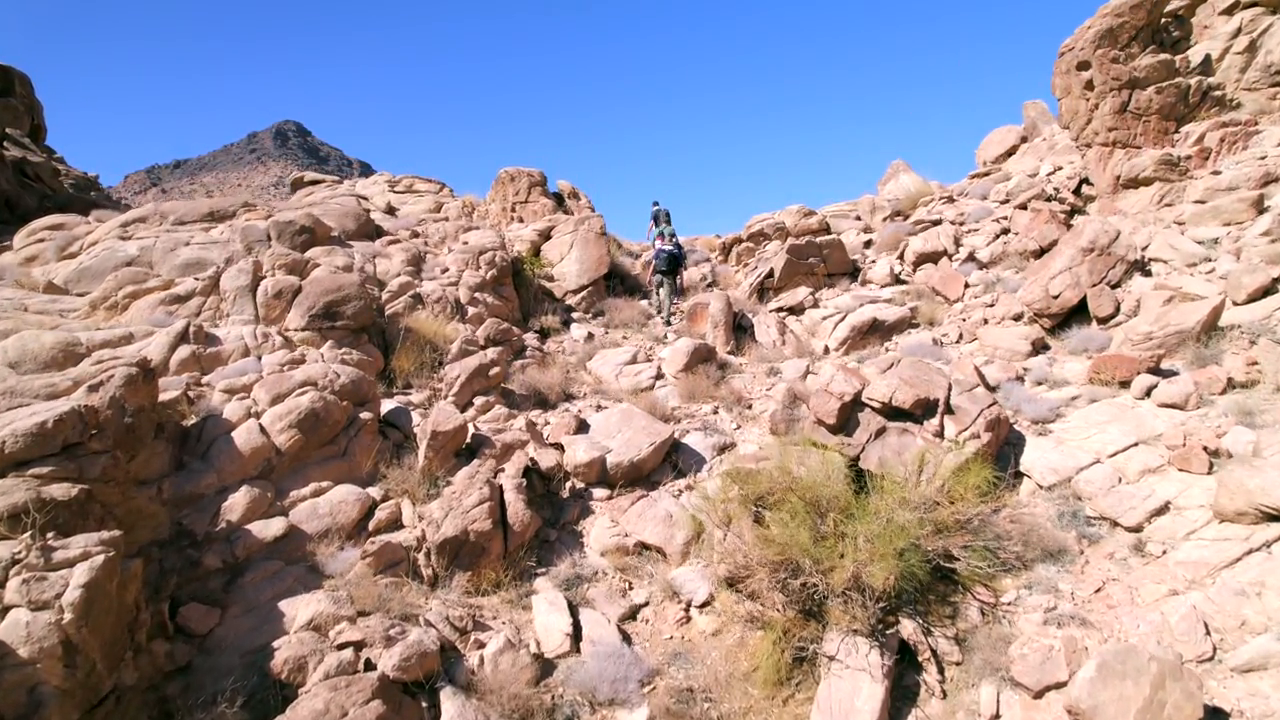

In [12]:
#Display of video frame number 2000 showing hiking activity
cv2_imshow(cv.cvtColor(frame.asnumpy(), cv.COLOR_BGR2RGB))

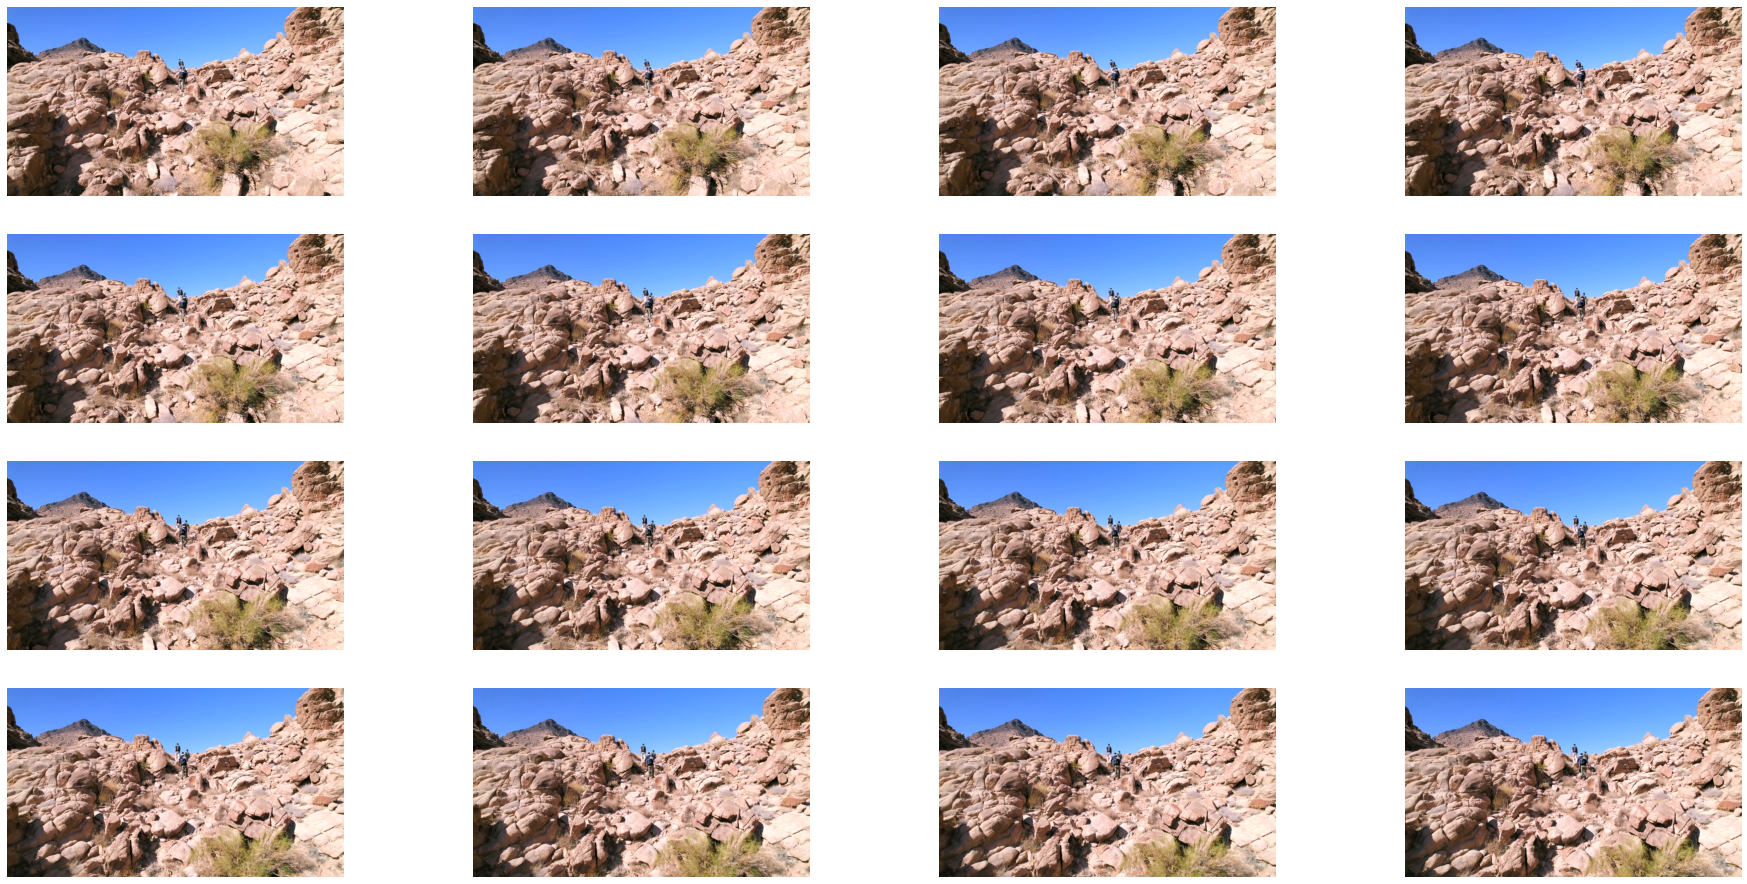

In [13]:
#Display of 16 consecutive frames showing hiking activity
ef disp_batches(video_reader, batch_indices, max_disp=5):
    %matplotlib inline
    from matplotlib import pyplot as plt
    import matplotlib.gridspec as gridspec
    cnt = 9
    data = vr.get_batch(batch_indices).asnumpy()
    columns = 4
    rows = max(1, (data.shape[0] + 1) // columns)
    fig = plt.figure(figsize = (32,(16 // columns) * rows))
    gs = gridspec.GridSpec(rows, columns)
    for i in range(data.shape[0]):
        plt.subplot(gs[i])
        plt.axis("off")
        plt.imshow(data[i])
    cnt += 1

n=2000
batch_indices = list(range(n, n+16*2, 2))
disp_batches(vr, batch_indices , 5)

# Using VideoMAE for Activity Identification In Youtube Video

In the following steps we import a pretrained VideoMAE Masked Autoencoder from the HuggingFace Library and use it to succesfully classify the activity in this batch of frames shown above. More information about VideoMAE: Masked Autoencoders can be found here.  https://arxiv.org/abs/2203.12602

In [15]:
import torch
import numpy as np
from transformers import VideoMAEFeatureExtractor, VideoMAEForVideoClassification

np.random.seed(0)


vr.seek(0)

# sample 16 frames

video = vr.get_batch(batch_indices).asnumpy()

feature_extractor = VideoMAEFeatureExtractor.from_pretrained("MCG-NJU/videomae-base-finetuned-kinetics")
model = VideoMAEForVideoClassification.from_pretrained("MCG-NJU/videomae-base-finetuned-kinetics")

inputs = feature_extractor(list(video), return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# model predicts one of the 400 Kinetics-400 classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

rock climbing


In [40]:
from pytube import YouTube
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 

video_link= "https://www.youtube.com/watch?v=ZbW5J8hwEag"

yt = YouTube(video_link)

In [41]:
yt.streams.all()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  """Entry point for launching an IPython kernel.


[<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="12fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="18" mime_type="video/mp4" res="360p" fps="24fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="22" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="24fps" vcodec="avc1.640028" progressive="False" type="video">,
 <Stream: itag="248" mime_type="video/webm" res="1080p" fps="24fps" vcodec="vp9" progressive="False" type="video">,
 <Stream: itag="136" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.64001f" progressive="False" type="video">,
 <Stream: itag="247" mime_type="video/webm" res="720p" fps="24fps" vcodec="vp9" progressive="False" type="video">,
 <Stream: itag="135" mime_type="video/mp4" res="480p" fps="24fps" vcodec="avc1.4d401e" progressive="False" t

In [42]:
stream = yt.streams[1]

In [43]:
stream.download()

'/content/Things to do in Maui - Travel Guide.mp4'

In [44]:
from decord import VideoReader
from decord import cpu, gpu
filename = "/content/Things to do in Maui - Travel Guide.mp4"
vr = VideoReader(filename, ctx=cpu(0))
# a file like object works as well, for in-memory decoding
with open(filename, 'rb') as f:
  vr = VideoReader(f, ctx=cpu(0))
print('video frames:', len(vr))

video frames: 9917


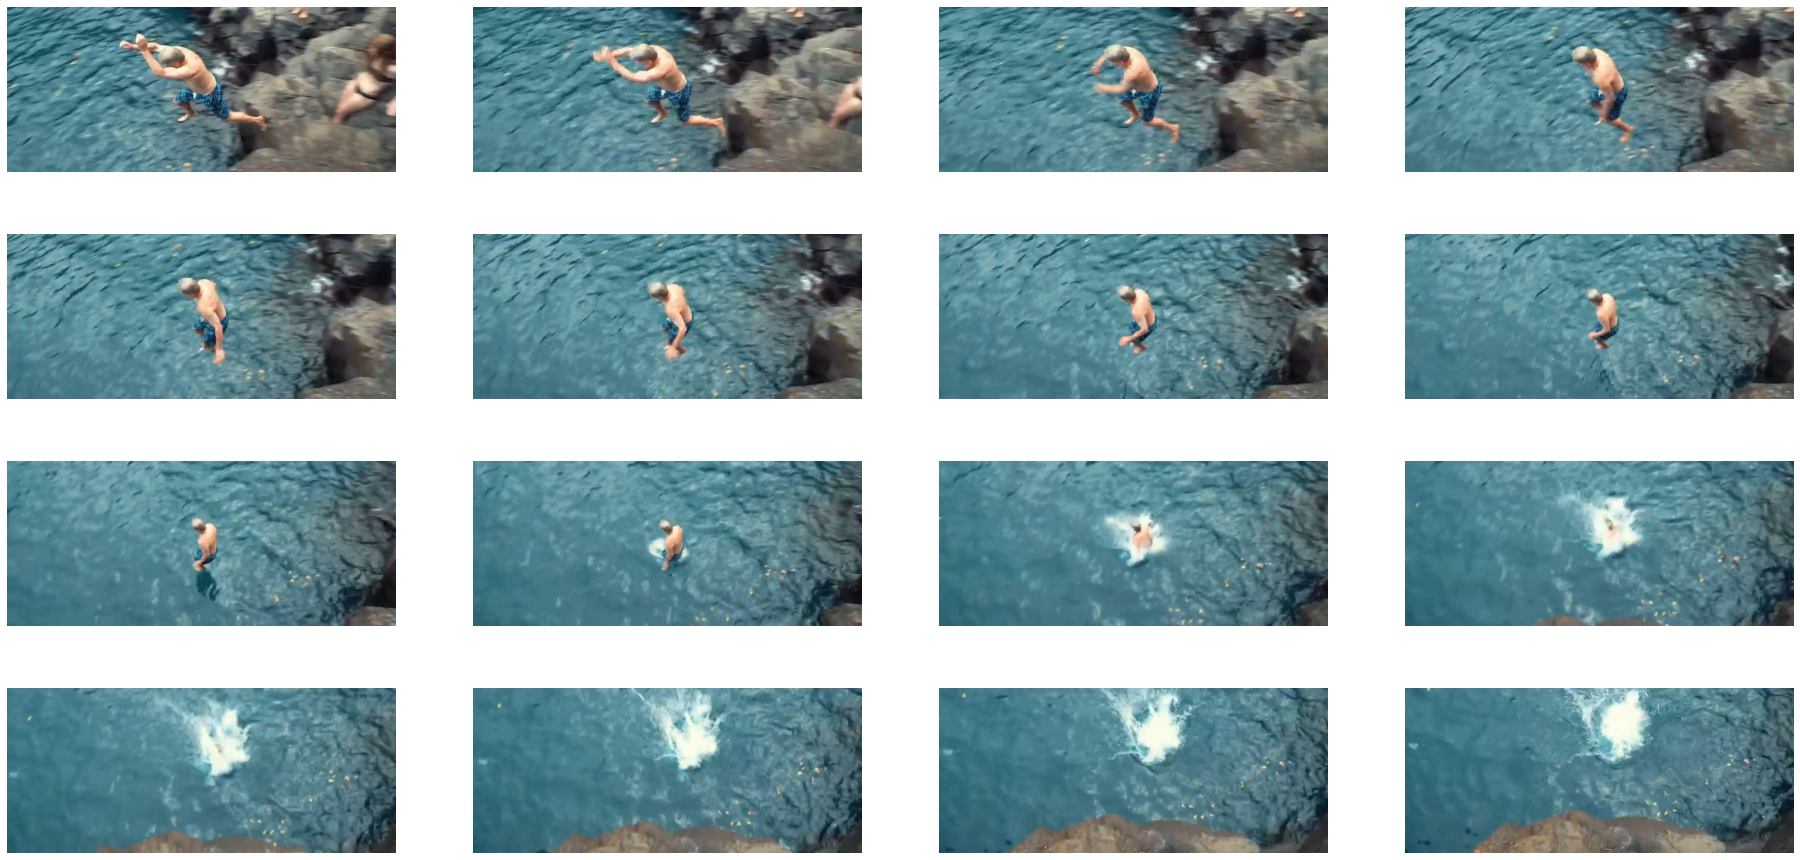

In [78]:
def disp_batches(video_reader, batch_indices, max_disp=5):
    %matplotlib inline
    from matplotlib import pyplot as plt
    import matplotlib.gridspec as gridspec
    cnt = 9
    data = vr.get_batch(batch_indices).asnumpy()
    columns = 4
    rows = max(1, (data.shape[0] + 1) // columns)
    fig = plt.figure(figsize = (32,(16 // columns) * rows))
    gs = gridspec.GridSpec(rows, columns)
    for i in range(data.shape[0]):
        plt.subplot(gs[i])
        plt.axis("off")
        plt.imshow(data[i])
    cnt += 1

n=1080
batch_indices = list(range(n, n+16*2, 2))
disp_batches(vr, batch_indices , 5)

In [76]:
import numpy as np
import torch
from transformers import VideoMAEFeatureExtractor, VideoMAEModel
from transformers import VideoMAEFeatureExtractor, VideoMAEForVideoClassification


vr.seek(0)

# sample 16 frames

video = vr.get_batch(batch_indices).asnumpy()

feature_extractor = VideoMAEFeatureExtractor.from_pretrained("MCG-NJU/videomae-base-finetuned-kinetics")
model = VideoMAEForVideoClassification.from_pretrained("MCG-NJU/videomae-base-finetuned-kinetics")

inputs = feature_extractor(list(video), return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# model predicts one of the 400 Kinetics-400 classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

16
diving cliff


In [ ]:
print(indices)

In [2]:
!nvidia-smi

Tue Nov 15 08:00:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!free -h --si | awk  '/Mem:/{print $2}'

26G


In [13]:
!lscpu 

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0-3
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin